In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB  # Import Naive Bayes
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#read data
df = pd.read_excel('Obesity_Dataset.xlsx')
df.head()


,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,2,18,155,2,2,3,1,3,2,1,2,3,3,4,2
1,2,18,158,2,2,3,1,1,2,1,2,1,3,3,2
2,2,18,159,2,2,2,1,3,2,3,2,2,3,4,2
3,2,18,162,2,2,2,2,2,2,2,2,1,3,4,2
4,2,18,165,2,1,2,1,3,2,1,2,3,3,2,2


In [60]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
df['Risk'] = df['Class'].apply(lambda x: 1 if x in [3, 4] else 0)

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))  # correction for bias
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

categorical_cols = ['Sex', 'Overweight_Obese_Family', 'Consumption_of_Fast_Food',
                    'Frequency_of_Consuming_Vegetables', 'Number_of_Main_Meals_Daily',
                    'Food_Intake_Between_Meals', 'Smoking', 'Physical_Excercise',
                    'Type_of_Transportation_Used','Liquid_Intake_Daily','Schedule_Dedicated_to_Technology','Calculation_of_Calorie_Intake']

# Tính Cramér's V giữa từng biến categorical và biến Class
results = {}
for col in categorical_cols:
    results[col] = cramers_v(df[col], df['Risk'])

# In kết quả
cramers_v_series = pd.Series(results).sort_values(ascending=False)
print(cramers_v_series)


Frequency_of_Consuming_Vegetables    0.506961
Type_of_Transportation_Used          0.484039
Number_of_Main_Meals_Daily           0.421628
Physical_Excercise                   0.353766
Consumption_of_Fast_Food             0.348620
Sex                                  0.302436
Calculation_of_Calorie_Intake        0.231633
Overweight_Obese_Family              0.204378
Food_Intake_Between_Meals            0.182357
Smoking                              0.124542
Schedule_Dedicated_to_Technology     0.114188
Liquid_Intake_Daily                  0.000000
dtype: float64


Naive Bayes - Accuracy Test:  0.4254658385093168
              precision    recall  f1-score   support

           1       0.11      0.69      0.18        13
           2       0.69      0.37      0.48       125
           3       0.63      0.31      0.41       131
           4       0.39      0.79      0.53        53

    accuracy                           0.43       322
   macro avg       0.45      0.54      0.40       322
weighted avg       0.59      0.43      0.45       322

Naive Bayes - Accuracy Train:  0.7680817610062893
              precision    recall  f1-score   support

           1       0.84      0.94      0.88       533
           2       0.66      0.62      0.64       232
           3       0.64      0.44      0.52       194
           4       0.77      0.79      0.78       313

    accuracy                           0.77      1272
   macro avg       0.73      0.70      0.71      1272
weighted avg       0.76      0.77      0.76      1272



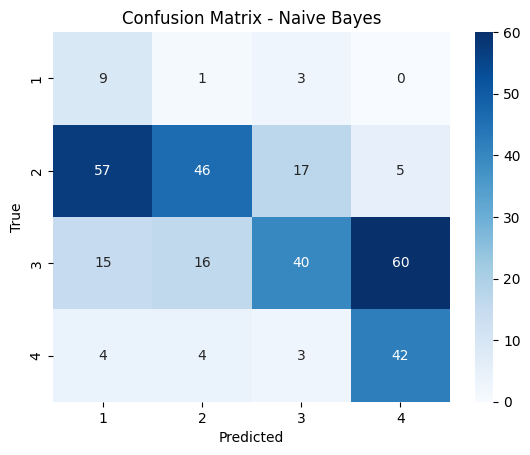

                              Feature  Importance
0                                 Age    0.319348
1                  Physical_Excercise    0.169284
2                              Height    0.151873
3   Frequency_of_Consuming_Vegetables    0.065585
4                 Liquid_Intake_Daily    0.055845
5            Consumption_of_Fast_Food    0.049659
6          Number_of_Main_Meals_Daily    0.048036
7           Food_Intake_Between_Meals    0.034777
8                                 Sex    0.032873
9                             Smoking    0.029393
10        Type_of_Transportation_Used    0.022844
11            Overweight_Obese_Family    0.020481
12      Calculation_of_Calorie_Intake    0.000000
13   Schedule_Dedicated_to_Technology    0.000000
Số lượng đặc trưng tốt nhất: 4.0, Accuracy: 1.0000


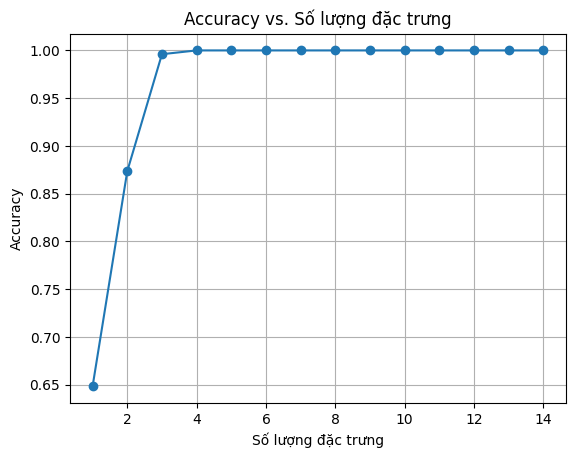

AdaBoost - Accuracy Test :  0.849802371541502
              precision    recall  f1-score   support

           1       0.93      0.96      0.94       112
           2       0.83      0.83      0.83        46
           3       0.60      0.72      0.66        29
           4       0.86      0.74      0.80        66

    accuracy                           0.85       253
   macro avg       0.80      0.81      0.81       253
weighted avg       0.86      0.85      0.85       253

AdaBoost - Accuracy Train :  0.9266600594648167
              precision    recall  f1-score   support

           1       0.98      0.98      0.98       421
           2       0.94      0.95      0.94       156
           3       0.77      0.89      0.83       151
           4       0.94      0.85      0.89       281

    accuracy                           0.93      1009
   macro avg       0.91      0.92      0.91      1009
weighted avg       0.93      0.93      0.93      1009



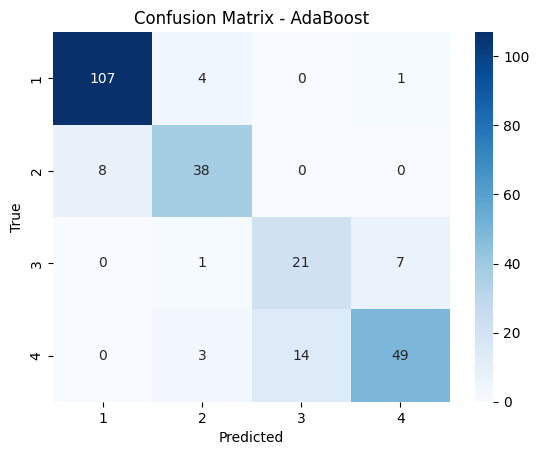

Naive Bayes - Accuracy Test:  0.782608695652174
              precision    recall  f1-score   support

           0       0.70      0.87      0.77       138
           1       0.88      0.72      0.79       184

    accuracy                           0.78       322
   macro avg       0.79      0.79      0.78       322
weighted avg       0.80      0.78      0.78       322

Naive Bayes - Accuracy Train:  0.8605851979345955
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       695
           1       0.82      0.84      0.83       467

    accuracy                           0.86      1162
   macro avg       0.85      0.86      0.86      1162
weighted avg       0.86      0.86      0.86      1162



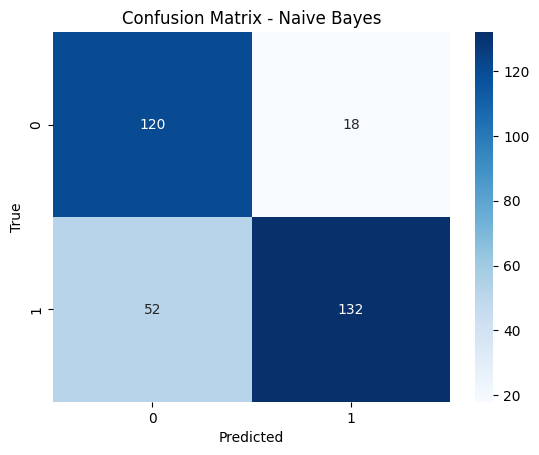

                              Feature  Importance
0                                 Age    0.403478
1                              Height    0.196616
2           Food_Intake_Between_Meals    0.078802
3          Number_of_Main_Meals_Daily    0.074984
4            Consumption_of_Fast_Food    0.060166
5   Frequency_of_Consuming_Vegetables    0.045677
6                  Physical_Excercise    0.045224
7         Type_of_Transportation_Used    0.042553
8                                 Sex    0.030285
9                             Smoking    0.022214
10            Overweight_Obese_Family    0.000000
11                Liquid_Intake_Daily    0.000000
12      Calculation_of_Calorie_Intake    0.000000
13   Schedule_Dedicated_to_Technology    0.000000
Số lượng đặc trưng tốt nhất: 9.0, Accuracy: 0.9697


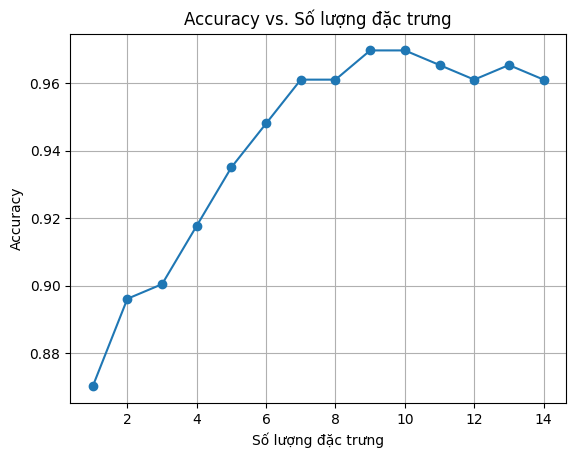

Accuracy Test (Top 9 Features): 0.9696969696969697
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       141
           1       0.97      0.96      0.96        90

    accuracy                           0.97       231
   macro avg       0.97      0.97      0.97       231
weighted avg       0.97      0.97      0.97       231

Accuracy Train (Top 9 Features): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       554
           1       1.00      1.00      1.00       366

    accuracy                           1.00       920
   macro avg       1.00      1.00      1.00       920
weighted avg       1.00      1.00      1.00       920



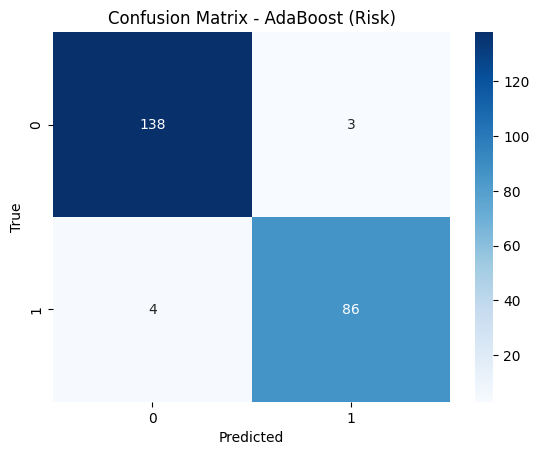

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report,  confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB  # Import Naive Bayes
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import EditedNearestNeighbours
# Bước 1: Đọc dữ liệu
df = pd.read_excel('Obesity_Dataset.xlsx')

categorical_columns = [
    'Sex', 'Overweight_Obese_Family', 'Consumption_of_Fast_Food',
    'Frequency_of_Consuming_Vegetables', 'Number_of_Main_Meals_Daily', 'Smoking',
    'Calculation_of_Calorie_Intake', 'Physical_Excercise', 'Type_of_Transportation_Used'
]

X = df.drop(columns=['Class', 'Liquid_Intake_Daily', 'Schedule_Dedicated_to_Technology','Food_Intake_Between_Meals'])
y = df['Class']  # Cột mục tiêu
# Bước 5: Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
categorical_indices = [X.columns.get_loc(col) for col in categorical_columns]
# SMOTENC
smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=42)
X_smote, y_smote = smote_nc.fit_resample(X_train, y_train)
# Áp dụng ENN để loại bỏ nhiễu sau khi oversampling
enn = EditedNearestNeighbours(n_neighbors=3)
X_res, y_res = enn.fit_resample(X_smote, y_smote)



# Bước 6: Áp dụng Naive Bayes
# GridSearch để tối ưu alpha
params = {'alpha': np.linspace(0.1, 1.5, 15)}
gs = GridSearchCV(MultinomialNB(), param_grid=params, cv=5, scoring='accuracy')
gs.fit(X_res, y_res)
best_model = gs.best_estimator_
y_pred_nb = best_model.predict(X_test)
y_pred_nb_train = best_model.predict(X_res) #Train

# Đánh giá Naive Bayes
print("Naive Bayes - Accuracy Test: ", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))
print("Naive Bayes - Accuracy Train: ", accuracy_score(y_res, y_pred_nb_train))
print(classification_report(y_res, y_pred_nb_train))

# Hiển thị confusion matrix Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(df['Class'].unique()), yticklabels=sorted(df['Class'].unique()))
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

















X_2 = df.drop(columns=['Class'])  
y_2 = df['Class'] 
categorical_columns_2 = [
    'Sex', 'Overweight_Obese_Family', 'Consumption_of_Fast_Food',
    'Frequency_of_Consuming_Vegetables', 'Number_of_Main_Meals_Daily',
    'Food_Intake_Between_Meals', 'Smoking',
    'Calculation_of_Calorie_Intake', 'Physical_Excercise', 'Type_of_Transportation_Used','Liquid_Intake_Daily', 'Schedule_Dedicated_to_Technology'
]
categorical_indices_2 = [X_2.columns.get_loc(col) for col in categorical_columns_2]
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

#Áp dụng SmoteNC
smote_nc = SMOTENC(categorical_features=categorical_indices_2, random_state=42)
X_smote_2, y_smote_2 = smote_nc.fit_resample(X_train_2, y_train_2)
# Áp dụng ENN để loại bỏ nhiễu sau khi oversampling
enn = EditedNearestNeighbours(n_neighbors=3)
X_res_2, y_res_2 = enn.fit_resample(X_smote_2, y_smote_2)


# Khởi tạo mô hình AdaBoost
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_res_2, y_res_2)
# Lấy feature importances
importance_df = pd.DataFrame({
    'Feature': X_2.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)
print(importance_df)
results = []  # Danh sách lưu accuracy cho từng số lượng feature
for i in range(1, len(importance_df) + 1):
    top_features = importance_df['Feature'].iloc[:i].values  
    X_top = X_res_2[top_features]
    X_res_top, X_res_top, y_res_top, y_res_top = train_test_split(X_top, y_res_2, test_size=0.2, random_state=42)
    adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42)
    param_grid = {
        'n_estimators': [50, 100, 200],
        'estimator__max_depth': [1, 2, 3, 4]
    }
    # Huấn luyện với GridSearchCV
    grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_res_top, y_res_top)
    # Dự đoán và đo độ chính xác
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_res_top)
    acc = accuracy_score(y_res_top, y_pred)
    results.append((i, acc))  # Lưu số lượng đặc trưng và độ chín xác
# Chuyển kết quả thành DataFrame để dễ xem
results_df = pd.DataFrame(results, columns=['Num_Features', 'Accuracy'])
# Tìm số lượng đặc trưng tốt nhất
best_row = results_df.loc[results_df['Accuracy'].idxmax()]
print(f"Số lượng đặc trưng tốt nhất: {best_row['Num_Features']}, Accuracy: {best_row['Accuracy']:.4f}")
# Vẽ biểu đồ
plt.plot(results_df['Num_Features'], results_df['Accuracy'], marker='o')
plt.title('Accuracy vs. Số lượng đặc trưng')
plt.xlabel('Số lượng đặc trưng')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()



top_4_features = importance_df['Feature'].iloc[:4].values
X_top4 = X_res_2[top_4_features]
X_train_top4, X_test_top4, y_train_top4, y_test_top4 = train_test_split(X_top4, y_res_2, test_size=0.2, random_state=42)




# Định nghĩa mô hình AdaBoost với base_estimator là DecisionTree
adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier())
# Danh sách tham số cần tối ưu
param_grid = {
    'n_estimators': [50, 100, 200],   # Số lượng weak learners
    'estimator__max_depth': [1, 2, 3, 4]

}
# Dùng GridSearch để tìm tổ hợp tham số tốt nhất
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_top4, y_train_top4)
# Dự đoán với mô hình tốt nhất
best_model = grid_search.best_estimator_
y_pred_ab = best_model.predict(X_test_top4)
y_pred_ab_train = best_model.predict(X_train_top4) #Train

# Đánh giá AdaBoost_GridSearch
print("AdaBoost - Accuracy Test : ", accuracy_score(y_test_top4, y_pred_ab))
print(classification_report(y_test_top4, y_pred_ab))
print("AdaBoost - Accuracy Train : ", accuracy_score(y_train_top4, y_pred_ab_train))
print(classification_report(y_train_top4, y_pred_ab_train))

# Hiển thị confusion matrix cho AdaBoost
conf_matrix_ab = confusion_matrix(y_test_top4, y_pred_ab)
sns.heatmap(conf_matrix_ab, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(df['Class'].unique()), yticklabels=sorted(df['Class'].unique()))
plt.title("Confusion Matrix - AdaBoost")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()





#BAI TOAN 2


df['Risk'] = df['Class'].apply(lambda x: 1 if x in [3, 4] else 0)
X_binary = df.drop(columns=['Class','Risk', 'Liquid_Intake_Daily', 'Schedule_Dedicated_to_Technology','Food_Intake_Between_Meals','Smoking'])
y_binary = df['Risk']  # Biến mục tiêu (Risk)
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

categorical_columns_2 = [
    'Sex', 'Overweight_Obese_Family', 'Consumption_of_Fast_Food',
    'Frequency_of_Consuming_Vegetables', 'Number_of_Main_Meals_Daily',
    'Calculation_of_Calorie_Intake', 'Physical_Excercise', 'Type_of_Transportation_Used'
]
categorical_indices_2 = [X_binary.columns.get_loc(col) for col in categorical_columns_2]
# SMOTENC
smote_nc_bin = SMOTENC(categorical_features=categorical_indices_2, random_state=42)
X_smote, y_smote = smote_nc_bin.fit_resample(X_train_bin, y_train_bin)
# Áp dụng ENN để loại bỏ nhiễu 
enn_bin = EditedNearestNeighbours(n_neighbors=3)
X_res_bin, y_res_bin = enn_bin.fit_resample(X_smote, y_smote)


# Huấn luyện Naive Bayes cho bài toán phân loại nguy cơ
# GridSearch để tối ưu alpha
params = {'alpha': np.linspace(0.1, 1.5, 15)}
gs = GridSearchCV(MultinomialNB(), param_grid=params, cv=5, scoring='accuracy')
gs.fit(X_res_bin, y_res_bin)
best_model = gs.best_estimator_
y_pred_ab_bin = best_model.predict(X_test_bin)
y_pred_ab_bin_train = best_model.predict(X_res_bin) #Train

# Đánh giá Naive Bayes
print("Naive Bayes - Accuracy Test: ", accuracy_score(y_test_bin, y_pred_ab_bin))
print(classification_report(y_test_bin, y_pred_ab_bin))
print("Naive Bayes - Accuracy Train: ", accuracy_score(y_res_bin, y_pred_ab_bin_train))
print(classification_report(y_res_bin, y_pred_ab_bin_train))

# Hiển thị confusion matrix cho tập dữ liệu test Naive Bayes
conf_matrix_nb = confusion_matrix(y_test_bin, y_pred_ab_bin)
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(df['Risk'].unique()), yticklabels=sorted(df['Risk'].unique()))
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
























X_3 = df.drop(columns=['Class','Risk'])
y_3 = df['Risk'] 
categorical_columns_3 = [
    'Sex', 'Overweight_Obese_Family', 'Consumption_of_Fast_Food',
    'Frequency_of_Consuming_Vegetables', 'Number_of_Main_Meals_Daily',
    'Food_Intake_Between_Meals', 'Smoking',
    'Calculation_of_Calorie_Intake', 'Physical_Excercise', 'Type_of_Transportation_Used','Liquid_Intake_Daily', 'Schedule_Dedicated_to_Technology'
]
categorical_indices_3 = [X_3.columns.get_loc(col) for col in categorical_columns_3]
# Tách dữ liệu
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=42)
# SMOTENC
smote_nc = SMOTENC(categorical_features=categorical_indices_3, random_state=42)
X_smote_3, y_smote_3 = smote_nc.fit_resample(X_train_3, y_train_3)
# Áp dụng ENN để loại bỏ nhiễu 
enn = EditedNearestNeighbours(n_neighbors=3)
X_res_3, y_res_3 = enn.fit_resample(X_smote_3, y_smote_3)

# Khởi tạo mô hình AdaBoost
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_res_3, y_res_3)
# Lấy feature importances
importance_df = pd.DataFrame({
    'Feature': X_res_3.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)
print(importance_df)

results = [] 
for i in range(1, len(importance_df) + 1):
    top_features = importance_df['Feature'].iloc[:i].values  # Chọn top i features
    # Tạo tập dữ liệu mới chỉ với top i features
    X_top = X_res_3[top_features]
    # Tách train/test
    X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y_res_3, test_size=0.2, random_state=42)
    # Định nghĩa mô hình AdaBoost với DecisionTree
    adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42)
    param_grid = {
        'n_estimators': [50, 100, 200],
        'estimator__max_depth': [1, 2, 3, 4]
    }
    # Huấn luyện với GridSearchCV
    grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_top, y_train_top)
    # Dự đoán và đo độ chính xác
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_top)
    acc = accuracy_score(y_test_top, y_pred)
    results.append((i, acc))  # Lưu số lượng đặc trưng và độ chính xác
# Chuyển kết quả thành DataFrame để dễ xem
results_df = pd.DataFrame(results, columns=['Num_Features', 'Accuracy'])
# Tìm số lượng đặc trưng tốt nhất
best_row = results_df.loc[results_df['Accuracy'].idxmax()]
print(f"Số lượng đặc trưng tốt nhất: {best_row['Num_Features']}, Accuracy: {best_row['Accuracy']:.4f}")
# Vẽ biểu đồ
plt.plot(results_df['Num_Features'], results_df['Accuracy'], marker='o')
plt.title('Accuracy vs. Số lượng đặc trưng')
plt.xlabel('Số lượng đặc trưng')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

top_9_features = importance_df['Feature'].iloc[:9].values
X_top9 = X_res_3[top_9_features]
X_train_top9, X_test_top9, y_train_top9, y_test_top9 = train_test_split(X_top9, y_res_3, test_size=0.2, random_state=42)

# Định nghĩa mô hình AdaBoost với base_estimator là DecisionTree
adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier())
# Danh sách tham số cần tối ưu
param_grid = {
    'n_estimators': [50, 100, 200],   # Số lượng weak learners
    'estimator__max_depth': [1, 2, 3, 4]

}
# Dùng GridSearch để tìm tổ hợp tham số tốt nhất
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_top9, y_train_top9)
# Dự đoán với mô hình tốt nhất
best_model = grid_search.best_estimator_
y_pred_ab_bin = best_model.predict(X_test_top9)
y_pred_ab_bin_train = best_model.predict(X_train_top9)#Train



print("Accuracy Test (Top 9 Features):", accuracy_score(y_test_top9, y_pred_ab_bin))
print(classification_report(y_test_top9, y_pred_ab_bin))
print("Accuracy Train (Top 9 Features):", accuracy_score(y_train_top9, y_pred_ab_bin_train))
print(classification_report(y_train_top9, y_pred_ab_bin_train))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_top9, y_pred_ab_bin)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(df['Risk'].unique()), yticklabels=sorted(df['Risk'].unique()))
plt.title("Confusion Matrix - AdaBoost (Risk)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()





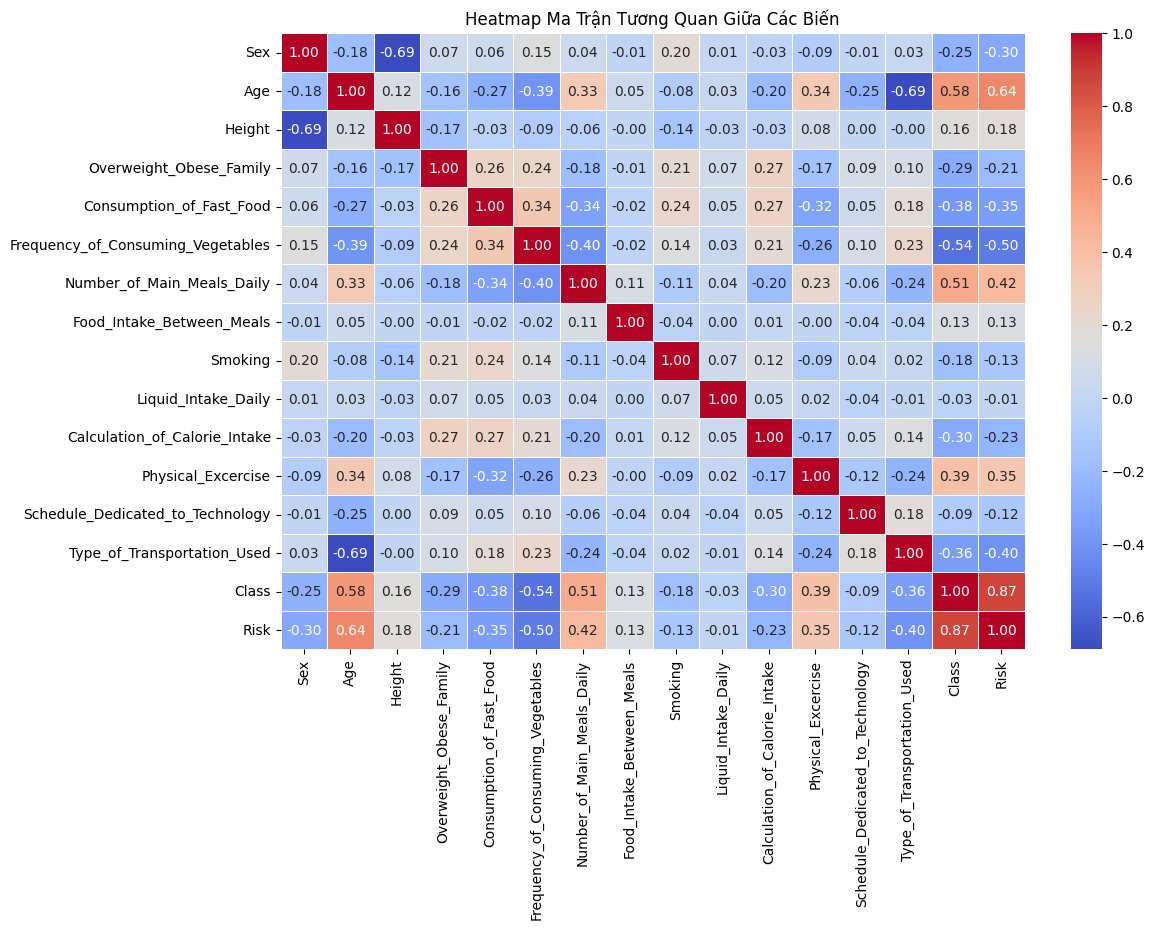

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tính ma trận tương quan
correlation_matrix = df.corr()

# Vẽ biểu đồ heatmap của ma trận tương quan
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Tiêu đề biểu đồ
plt.title("Heatmap Ma Trận Tương Quan Giữa Các Biến")

# Hiển thị biểu đồ
plt.show()

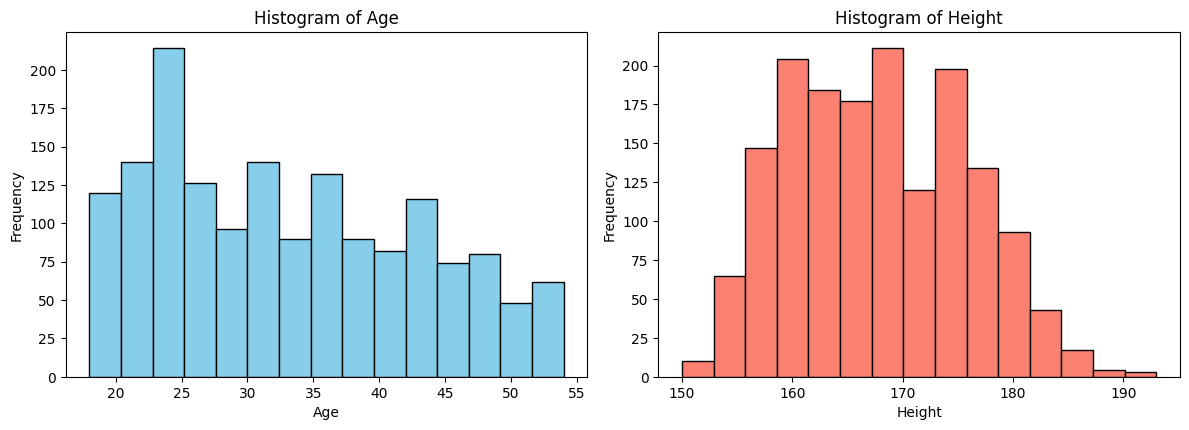

In [63]:
import matplotlib.pyplot as plt

age = df['Age']
height = df['Height']

plt.figure(figsize=(12, 8))  # Kích thước phù hợp

# Biểu đồ 1: Histogram của Age
plt.subplot(2, 2, 1)  
plt.hist(age, bins=15, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Biểu đồ 2: Histogram của Height
plt.subplot(2, 2, 2)  
plt.hist(height, bins=15, color='salmon', edgecolor='black')
plt.title('Histogram of Height')
plt.xlabel('Height')
plt.ylabel('Frequency')


# Đảm bảo bố cục đẹp, tránh chồng chéo
plt.tight_layout()
plt.show()


In [64]:
# Định nghĩa lại biến categorical_columns sau khi reset môi trường
categorical_columns = [
    'Sex', 'Overweight_Obese_Family', 'Consumption_of_Fast_Food',
    'Frequency_of_Consuming_Vegetables', 'Number_of_Main_Meals_Daily', 'Smoking',
    'Calculation_of_Calorie_Intake', 'Physical_Excercise', 'Type_of_Transportation_Used'
]

# Lấy dữ liệu các cột phân loại
categorical_df = df[categorical_columns]
# Lấy dữ liệu cột Class
Class_df = df[['Class']]
# Lấy dữ liệu cột Risk
Risk_df = df[['Risk']]

# Thay thế các giá trị 1 và 2 trong cột 'Sex' thành 'Male' và 'Female'
categorical_df['Sex'] = categorical_df['Sex'].map({1: 'Male', 2: 'Female'})
categorical_df['Overweight_Obese_Family'] = categorical_df['Overweight_Obese_Family'].map({1: 'Yes', 2: 'No'})
categorical_df['Consumption_of_Fast_Food'] = categorical_df['Consumption_of_Fast_Food'].map({1: 'Yes', 2: 'No'})
categorical_df['Frequency_of_Consuming_Vegetables'] = categorical_df['Frequency_of_Consuming_Vegetables'].map({1: 'Rarely', 2: 'Sometimes', 3: 'Always'})
categorical_df['Number_of_Main_Meals_Daily'] = categorical_df['Number_of_Main_Meals_Daily'].map({1: '1-2', 2: '3', 3: '3+'})
categorical_df['Smoking'] = categorical_df['Smoking'].map({1: 'yes', 2: 'no'})
categorical_df['Calculation_of_Calorie_Intake'] = categorical_df['Calculation_of_Calorie_Intake'].map({1: 'yes', 2: 'no'})
categorical_df['Physical_Excercise'] = categorical_df['Physical_Excercise'].map({1: 'No physical', 2: '1-2 days', 3: '3-4 days',4:'5-6 days',5:'6+ days'})
categorical_df['Type_of_Transportation_Used'] = categorical_df['Type_of_Transportation_Used'].map({1: 'Automobile', 2: 'Motorbike', 3: 'Bike',4:'Public Transportation',5:'Walking'})
categorical_df.head()


Class_df['Class'] = Class_df['Class'].map({1: 'Under weight', 2: 'Normal', 3: 'Overweight',4:'Obesity'})


Risk_df['Risk'] = Risk_df['Risk'].map({0: 'No Risk', 1: 'Risk'})




C:\Users\VICTUS\AppData\Local\Temp\ipykernel_45268\2445798514.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['Sex'] = categorical_df['Sex'].map({1: 'Male', 2: 'Female'})
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_45268\2445798514.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['Overweight_Obese_Family'] = categorical_df['Overweight_Obese_Family'].map({1: 'Yes', 2: 'No'})
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_45268\2445798514.py:18: SettingWithCopyWarning: 
A

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_45268\3616132562.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categorical_df[col], palette="Set2")
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_45268\3616132562.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categorical_df[col], palette="Set2")
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_45268\3616132562.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categorical_df[col], palette="Set2")
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_45268\3616132562.py:12: FutureWarn

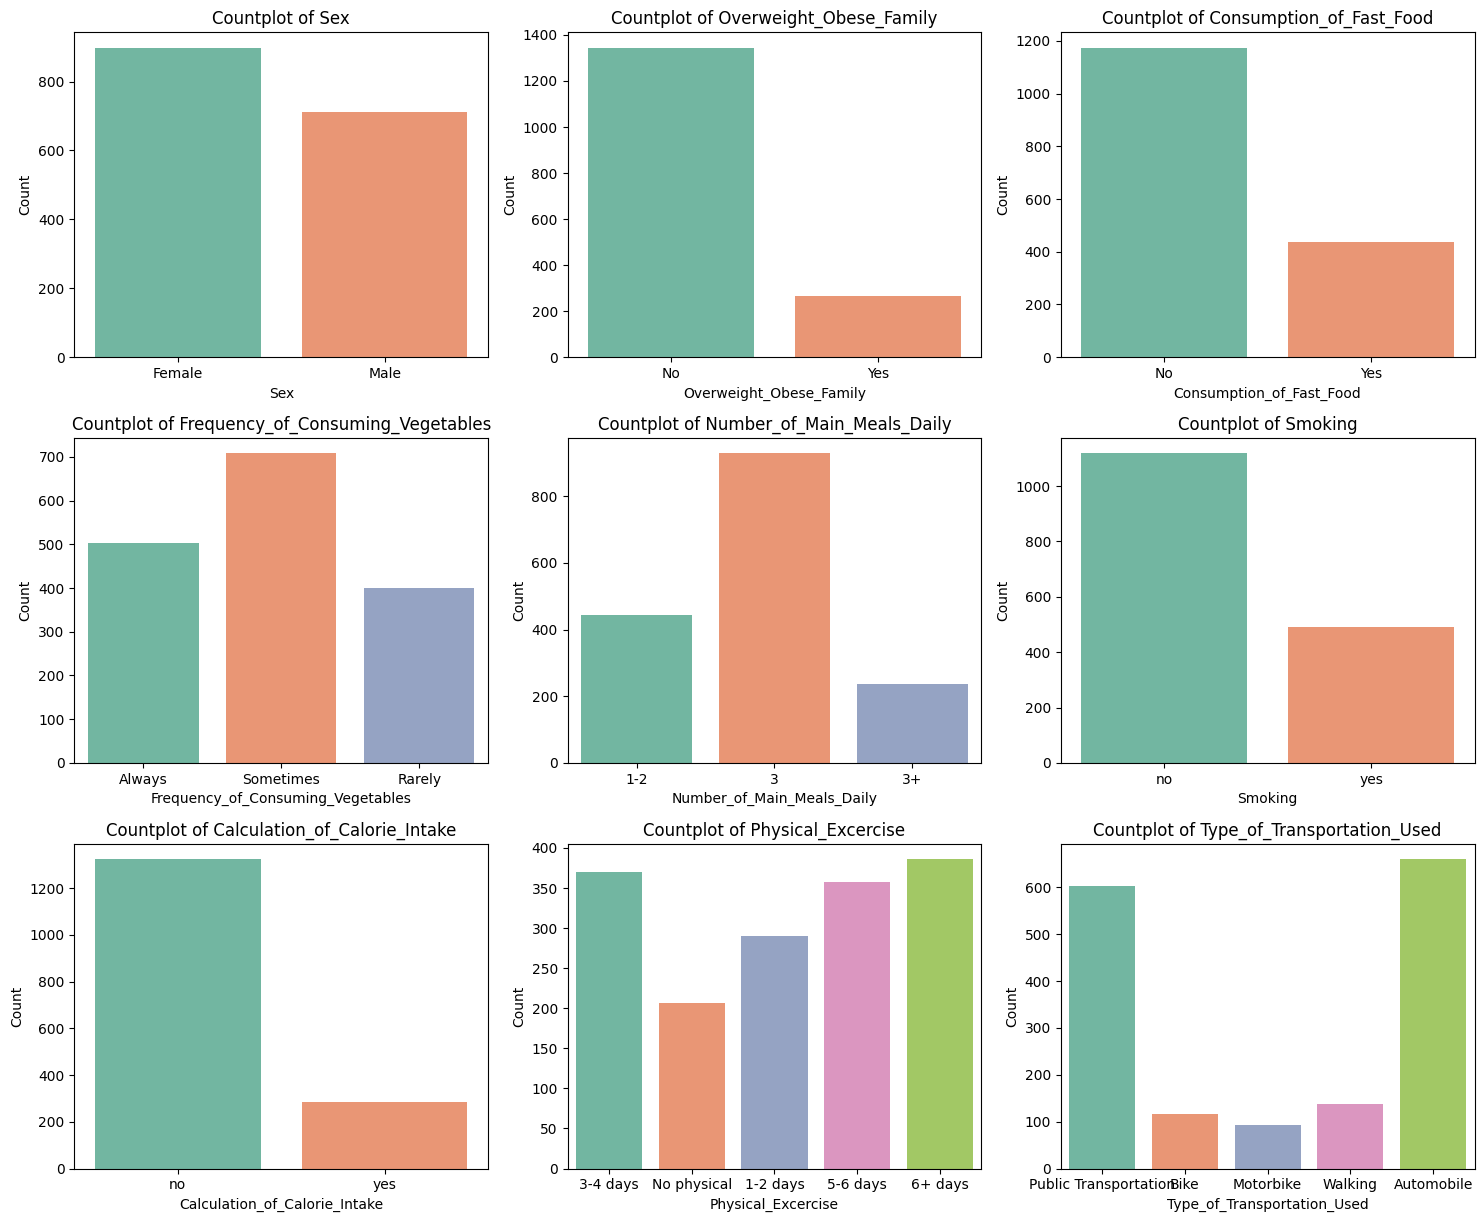

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_45268\3616132562.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Risk_df['Risk'], palette="Set2")


Text(0, 0.5, 'Count')

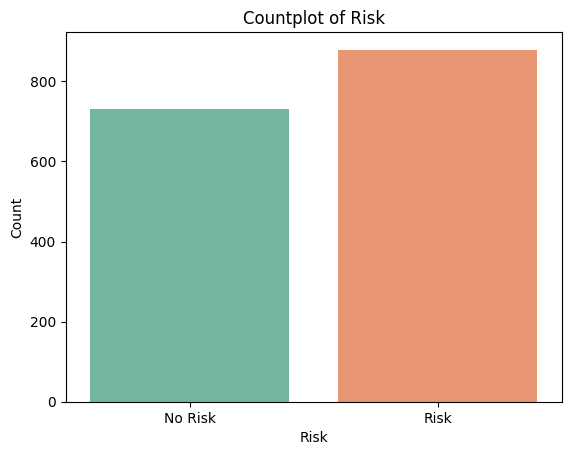

In [65]:
# Danh sách các cột phân loại
categorical_columns = [
    'Sex', 'Overweight_Obese_Family', 'Consumption_of_Fast_Food',
    'Frequency_of_Consuming_Vegetables', 'Number_of_Main_Meals_Daily','Smoking', 
    'Calculation_of_Calorie_Intake', 'Physical_Excercise','Type_of_Transportation_Used'
]
# Vẽ biểu đồ countplot cho từng cột phân loại
plt.figure(figsize=(15, 20))  # Kích thước toàn bộ figure

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(5, 3, i)  # Lưới: 5 hàng, 3 cột
    sns.countplot(x=categorical_df[col], palette="Set2")
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

# Căn chỉnh bố cục gọn gàng
plt.tight_layout()
plt.show()


sns.countplot(x=Risk_df['Risk'], palette="Set2")
plt.title(f'Countplot of Risk')
plt.xlabel('Risk')
plt.ylabel('Count')


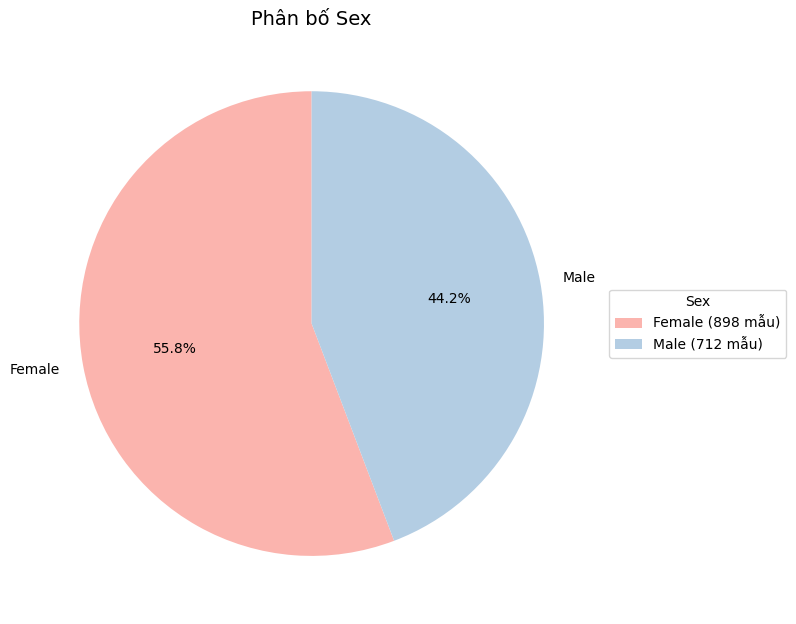

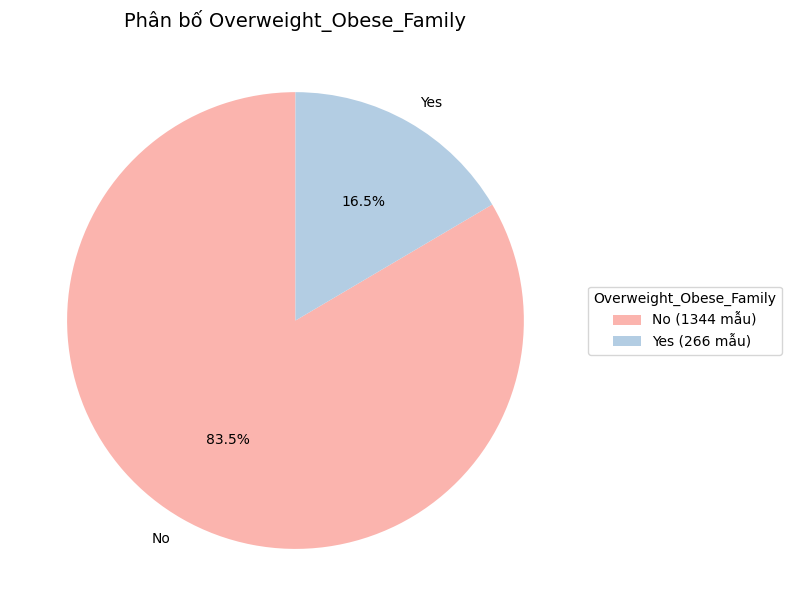

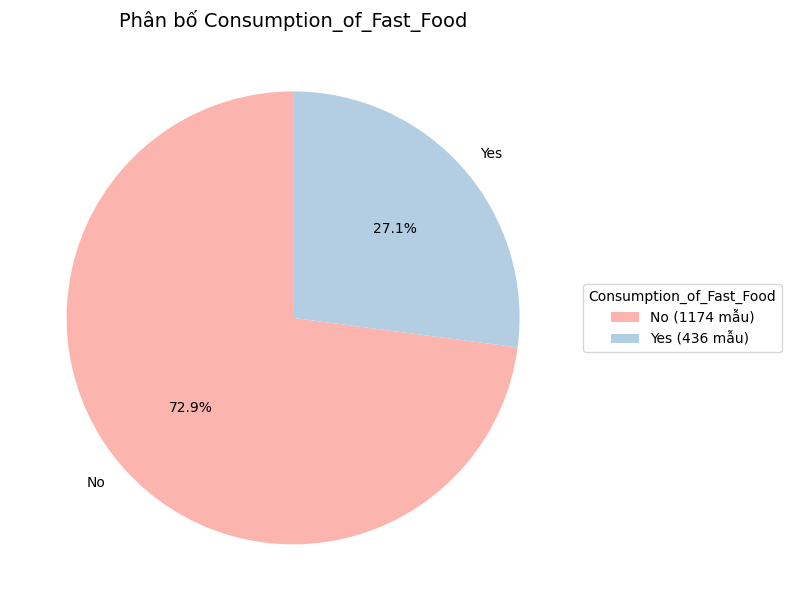

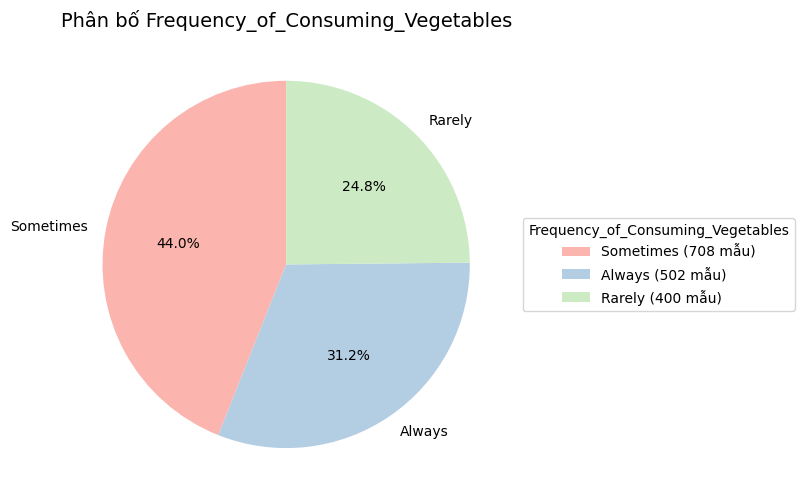

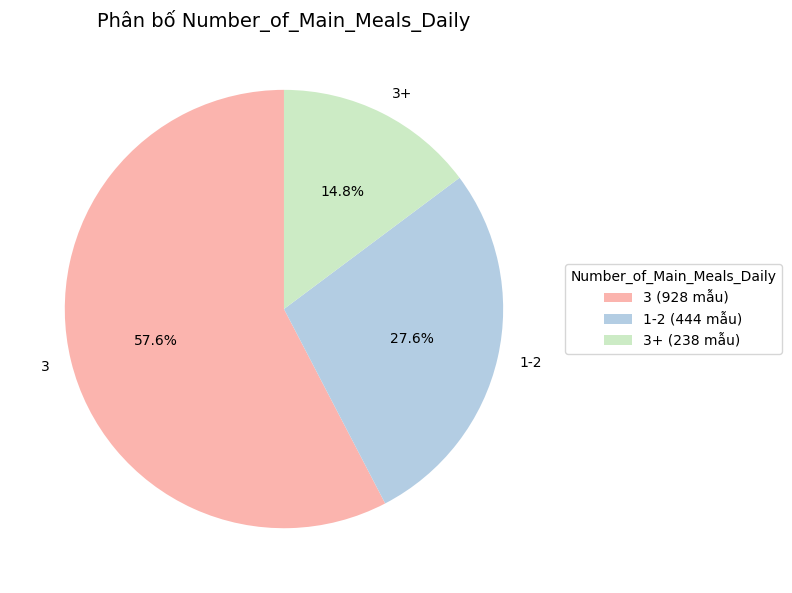

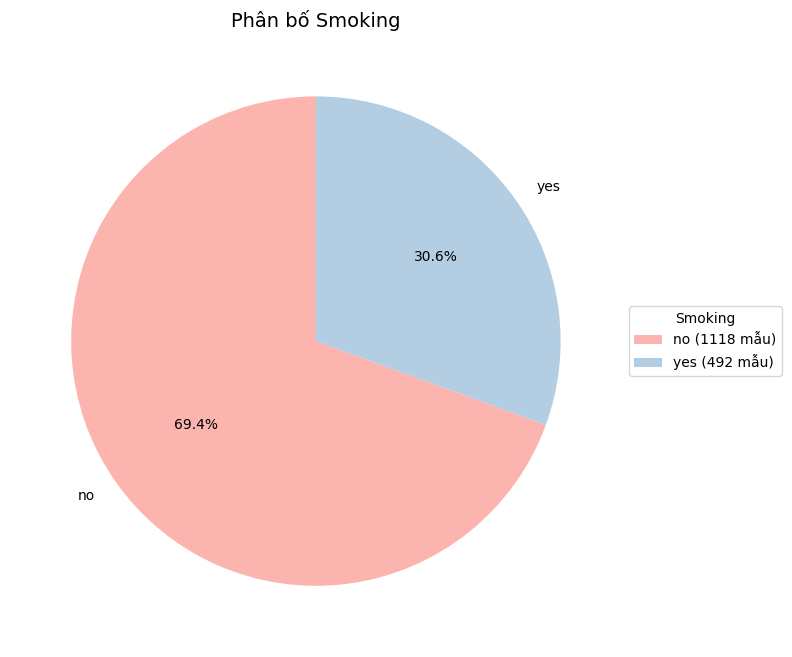

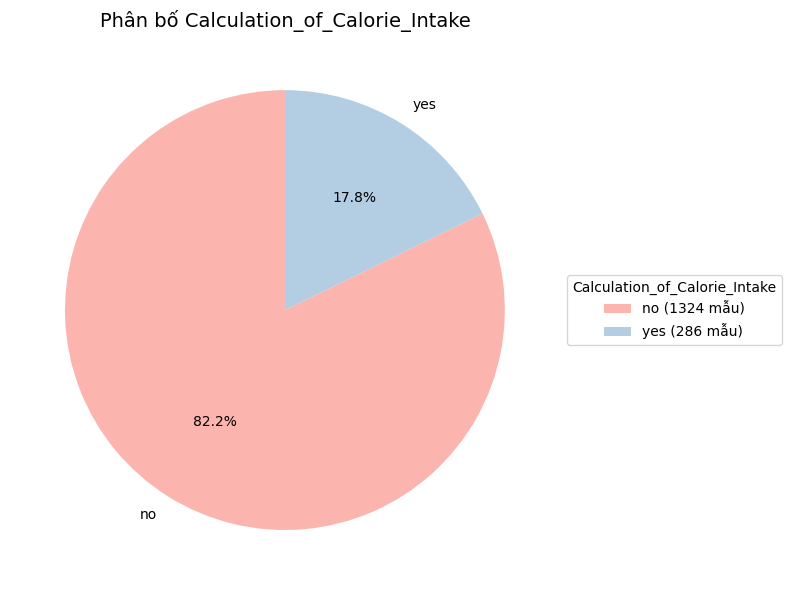

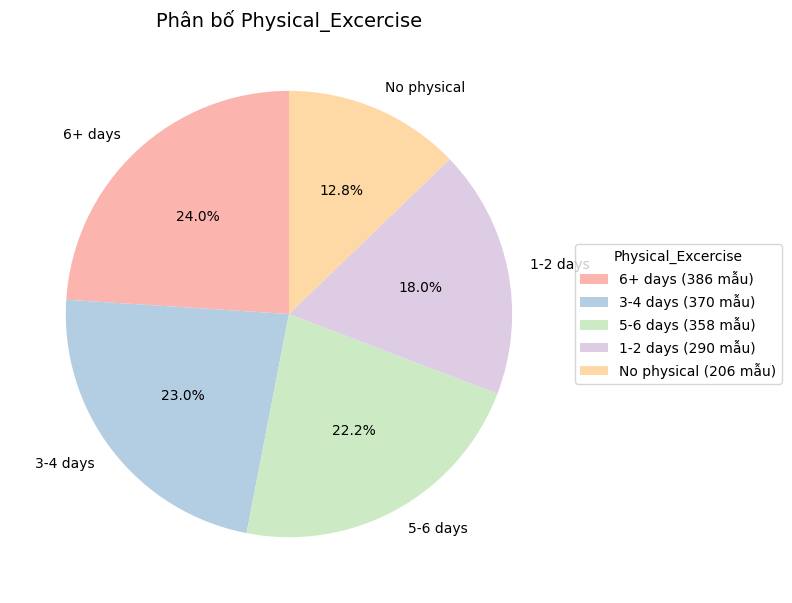

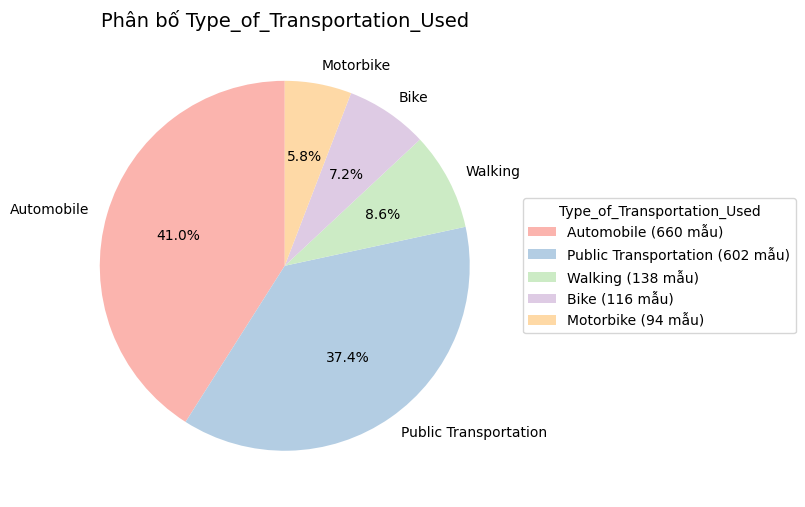

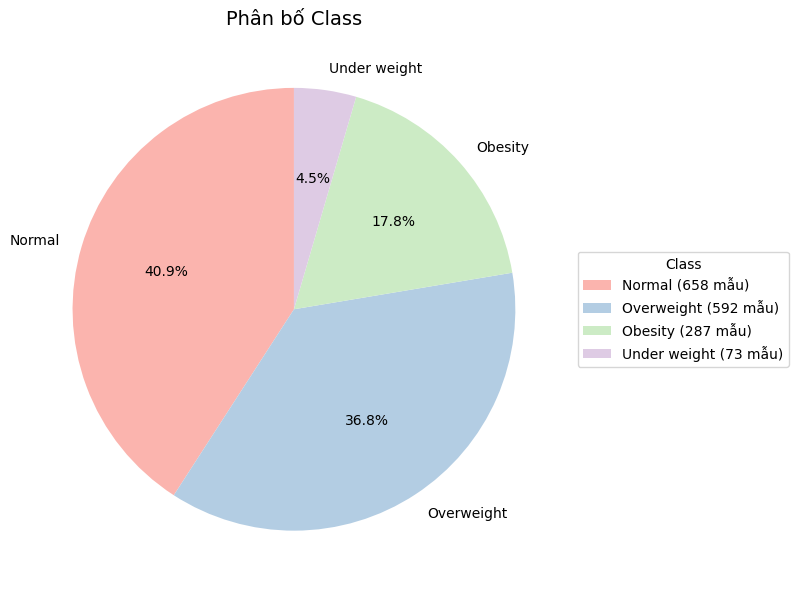

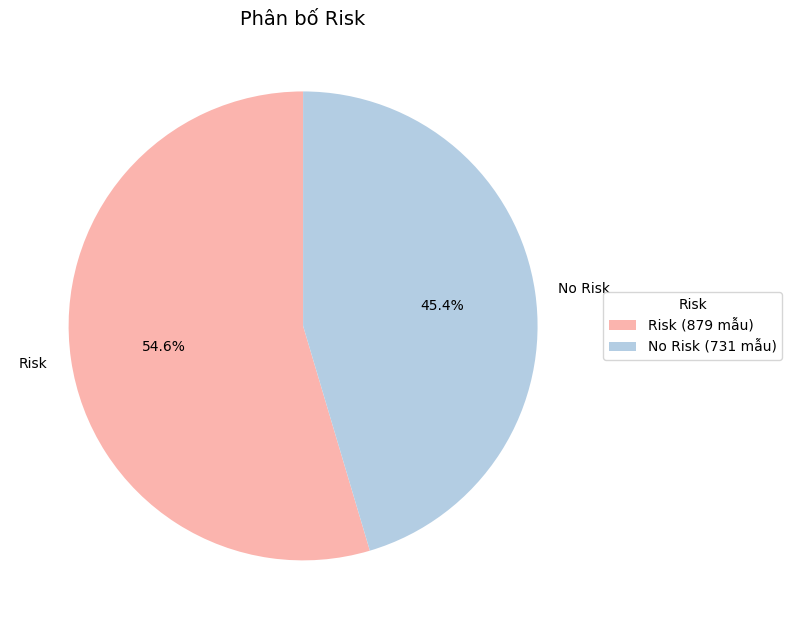

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu
df = pd.read_excel("Obesity_Dataset.xlsx", sheet_name='Obesity_Dataset ')

# Danh sách các cột phân loại
categorical_columns = [
    'Sex', 'Overweight_Obese_Family', 'Consumption_of_Fast_Food',
    'Frequency_of_Consuming_Vegetables', 'Number_of_Main_Meals_Daily', 'Smoking',
    'Calculation_of_Calorie_Intake', 'Physical_Excercise',
    'Type_of_Transportation_Used', 'Class', 'Risk'  
]

df['Risk'] = df['Class'].apply(lambda x: 1 if x in [3, 4] else 0)
# Ánh xạ lại các nhãn cho dễ đọc
df['Sex'] = df['Sex'].map({1: 'Male', 2: 'Female'})
df['Overweight_Obese_Family'] = df['Overweight_Obese_Family'].map({1: 'Yes', 2: 'No'})
df['Consumption_of_Fast_Food'] = df['Consumption_of_Fast_Food'].map({1: 'Yes', 2: 'No'})
df['Frequency_of_Consuming_Vegetables'] = df['Frequency_of_Consuming_Vegetables'].map({1: 'Rarely', 2: 'Sometimes', 3: 'Always'})
df['Number_of_Main_Meals_Daily'] = df['Number_of_Main_Meals_Daily'].map({1: '1-2', 2: '3', 3: '3+'})
df['Smoking'] = df['Smoking'].map({1: 'yes', 2: 'no'})
df['Calculation_of_Calorie_Intake'] = df['Calculation_of_Calorie_Intake'].map({1: 'yes', 2: 'no'})
df['Physical_Excercise'] = df['Physical_Excercise'].map({1: 'No physical', 2: '1-2 days', 3: '3-4 days', 4: '5-6 days', 5: '6+ days'})
df['Type_of_Transportation_Used'] = df['Type_of_Transportation_Used'].map({1: 'Automobile', 2: 'Motorbike', 3: 'Bike', 4: 'Public Transportation', 5: 'Walking'})
df['Class'] = df['Class'].map({1: 'Under weight', 2: 'Normal', 3: 'Overweight', 4: 'Obesity'})
df['Risk'] = df['Risk'].map({0: 'No Risk', 1: 'Risk'})

# Vẽ biểu đồ tròn cho từng cột
for col in categorical_columns:
    value_counts = df[col].value_counts()

    fig, ax = plt.subplots(figsize=(8, 8))
    wedges, texts, autotexts = ax.pie(
        value_counts,
        labels=value_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'color': 'black'},
        colors=plt.cm.Pastel1.colors
    )

    ax.set_title(f"Phân bố {col}", fontsize=14)
    ax.legend(wedges, [f"{k} ({v} mẫu)" for k, v in zip(value_counts.index, value_counts)], title=col, loc="center left", bbox_to_anchor=(1, 0.5))

    plt.tight_layout()
    plt.show()
    plt.close(fig)


In [67]:

# plt.figure(figsize=(14, 8))  # Tăng kích thước của figure
# numerical_columns = df[['Age','Height']].columns
# binned_col = pd.qcut(df['Age'], q=5, duplicates='drop')
# binned_col_labels = [f"{int(interval.left)}-{int(interval.right)}" for interval in binned_col.cat.categories]
# df['Age_Binned'] = pd.qcut(df['Age'], q=5, labels=binned_col_labels, duplicates='drop')
# # Vẽ boxplot
# sns.boxplot(x=df['Age_Binned'], y=df['Class'], palette='Set1')
# plt.title('Boxplot: Age vs Class', fontsize=20)
# plt.xlabel('Age (Binned)', fontsize=16)
# plt.ylabel('Class', fontsize=16)
# plt.tight_layout()
# plt.show()


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_45268\3972047544.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=Class_df['Class'], y='Age', data=df, palette='Set1')


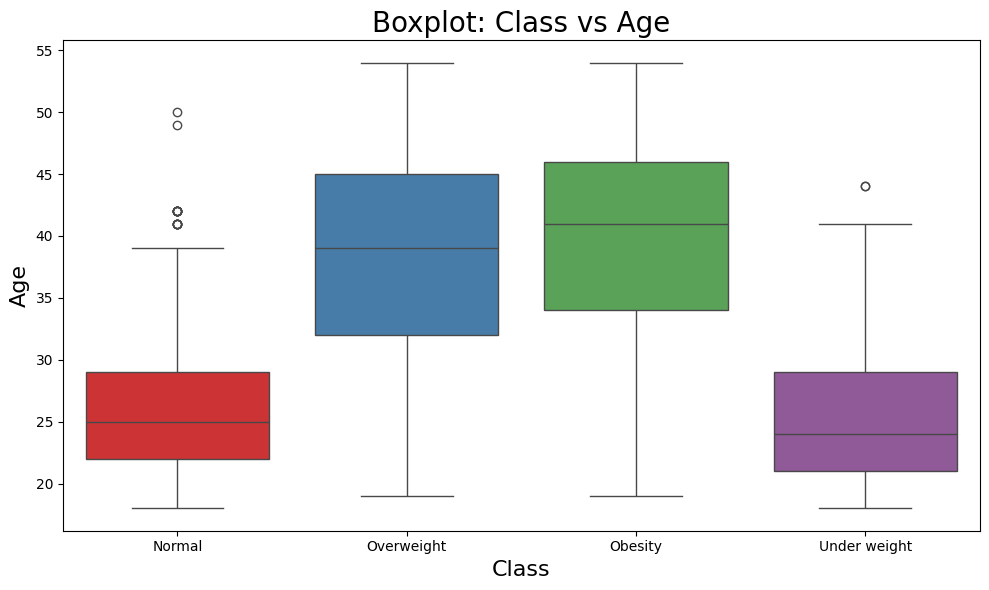

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x=Class_df['Class'], y='Age', data=df, palette='Set1')
plt.title('Boxplot: Class vs Age', fontsize=20)
plt.xlabel('Class', fontsize=16)
plt.ylabel('Age', fontsize=16)
plt.tight_layout()
plt.show()


In [69]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# ax = sns.boxplot(x=Class_df['Class'], y='Age', data=df, palette='Set1')
# plt.title('Boxplot: Class vs Age', fontsize=20)
# plt.xlabel('Class', fontsize=16)
# plt.ylabel('Age', fontsize=16)

# # Tính và hiển thị Q1, Q2, Q3 cho từng nhóm
# grouped = df.groupby(Class_df['Class'])['Age']
# positions = range(len(grouped))

# for pos, (label, group) in zip(positions, grouped):
#     q1 = group.quantile(0.25)
#     q2 = group.median()
#     q3 = group.quantile(0.75)

#     ax.text(pos, q1, f'Q1={q1:.1f}', ha='center', va='bottom', fontsize=9, color='blue')
#     ax.text(pos, q2, f'Q2={q2:.1f}', ha='center', va='bottom', fontsize=9, color='green')
#     ax.text(pos, q3, f'Q3={q3:.1f}', ha='center', va='bottom', fontsize=9, color='red')

# plt.tight_layout()
# plt.show()


In [70]:

# plt.figure(figsize=(14, 8))  # Tăng kích thước của figure
# numerical_columns = df[['Age','Height']].columns
# binned_col = pd.qcut(df['Height'], q=5, duplicates='drop')
# binned_col_labels = [f"{int(interval.left)}-{int(interval.right)}" for interval in binned_col.cat.categories]
# df['Height_Binned'] = pd.qcut(df['Height'], q=5, labels=binned_col_labels, duplicates='drop')
# # Vẽ boxplot
# sns.boxplot(x=df['Height_Binned'], y=df['Class'], palette='Set1')
# plt.title('Boxplot: Height vs Class', fontsize=20)
# plt.xlabel('Height (Binned)', fontsize=16)
# plt.ylabel('Class', fontsize=16)
# plt.tight_layout()
# plt.show()


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_45268\3367299494.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=Class_df['Class'], y='Height', data=df, palette='Set1')


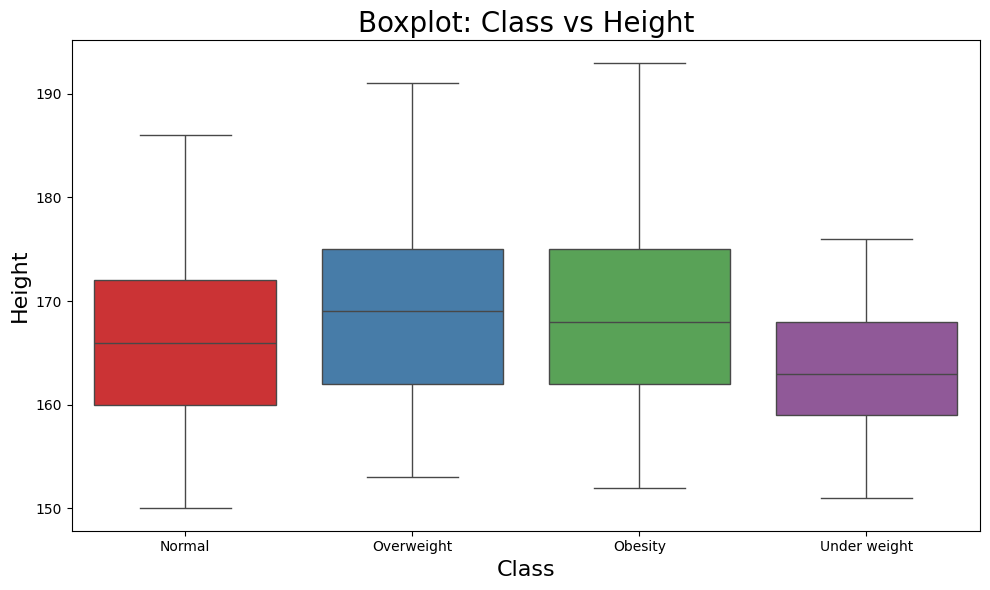

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x=Class_df['Class'], y='Height', data=df, palette='Set1')
plt.title('Boxplot: Class vs Height', fontsize=20)
plt.xlabel('Class', fontsize=16)
plt.ylabel('Height', fontsize=16)
plt.tight_layout()
plt.show()


In [72]:

# plt.figure(figsize=(14, 8))  # Tăng kích thước của figure
# binned_col = pd.qcut(df['Age'], q=5, duplicates='drop')
# binned_col_labels = [f"{int(interval.left)}-{int(interval.right)}" for interval in binned_col.cat.categories]
# df['Age_Binned'] = pd.qcut(df['Age'], q=5, labels=binned_col_labels, duplicates='drop')
# # Vẽ boxplot
# sns.boxplot(x=df['Age_Binned'], y=df['Risk'], palette='Set1')
# plt.title('Boxplot: Age vs Risk', fontsize=20)
# plt.xlabel('Age (Binned)', fontsize=16)
# plt.ylabel('Risk', fontsize=16)
# plt.tight_layout()
# plt.show()


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_45268\1875367325.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=Risk_df['Risk'], y='Age', data=df, palette='Set1')


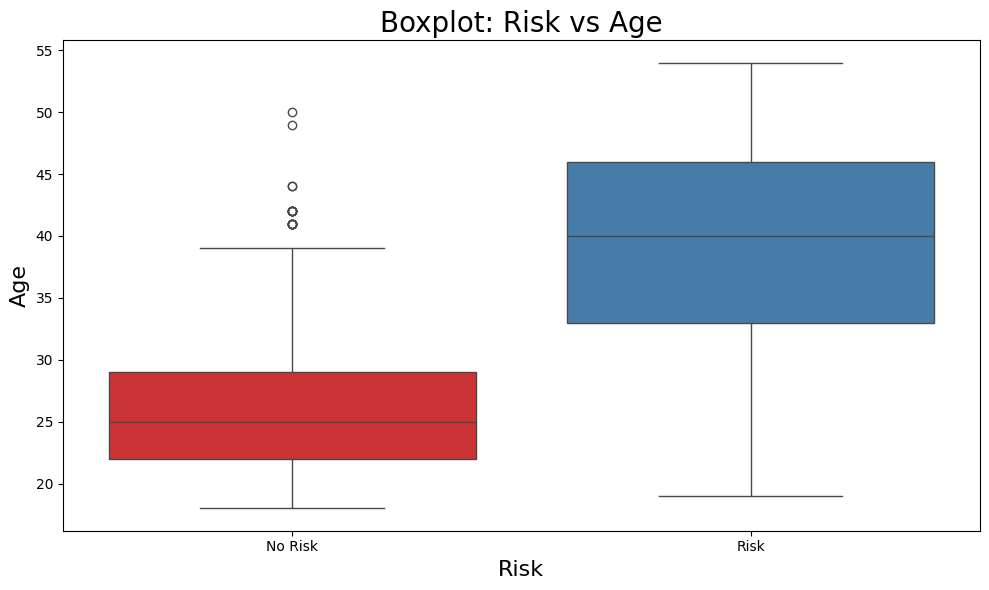

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x=Risk_df['Risk'], y='Age', data=df, palette='Set1')
plt.title('Boxplot: Risk vs Age', fontsize=20)
plt.xlabel('Risk', fontsize=16)
plt.ylabel('Age', fontsize=16)
plt.tight_layout()
plt.show()

In [74]:

# plt.figure(figsize=(14, 8))  # Tăng kích thước của figure
# binned_col = pd.qcut(df['Height'], q=5, duplicates='drop')
# binned_col_labels = [f"{int(interval.left)}-{int(interval.right)}" for interval in binned_col.cat.categories]
# df['Height_Binned'] = pd.qcut(df['Height'], q=5, labels=binned_col_labels, duplicates='drop')
# # Vẽ boxplot
# sns.boxplot(x=df['Height_Binned'], y=df['Risk'], palette='Set1')
# plt.title('Boxplot: Height vs Risk', fontsize=20)
# plt.xlabel('Height (Binned)', fontsize=16)
# plt.ylabel('Risk', fontsize=16)
# plt.tight_layout()
# plt.show()


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_45268\643444774.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=Risk_df['Risk'], y='Height', data=df, palette='Set1')


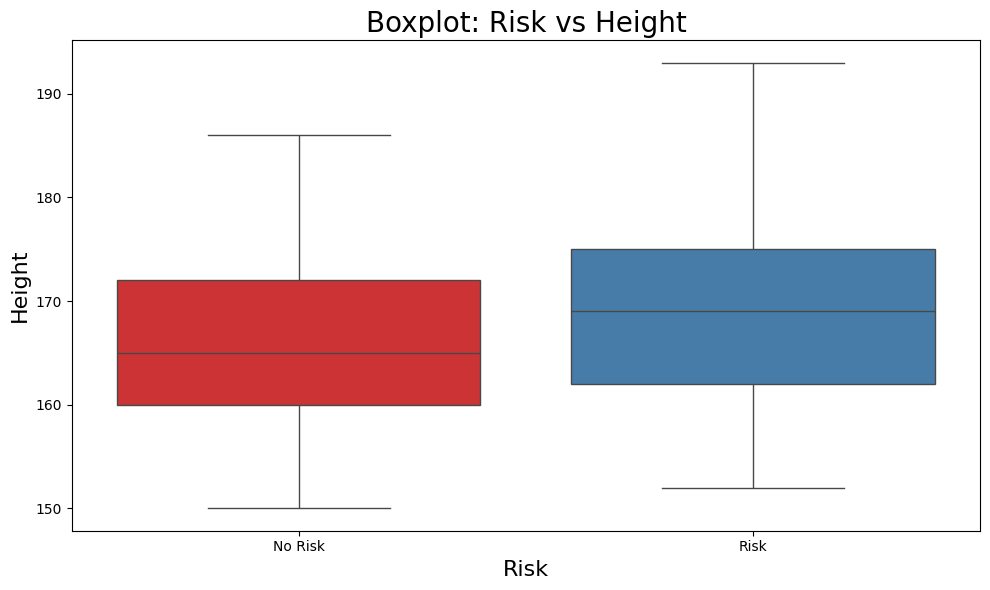

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x=Risk_df['Risk'], y='Height', data=df, palette='Set1')
plt.title('Boxplot: Risk vs Height', fontsize=20)
plt.xlabel('Risk', fontsize=16)
plt.ylabel('Height', fontsize=16)
plt.tight_layout()
plt.show()

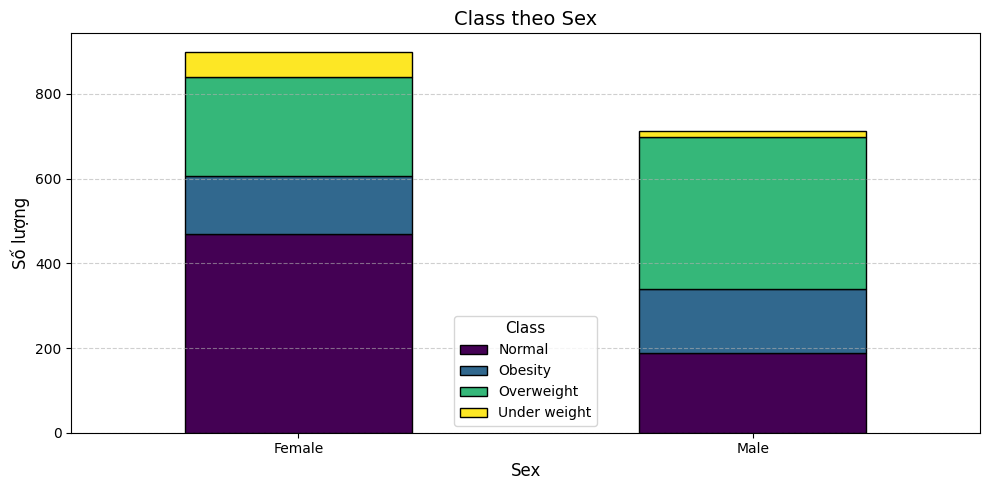

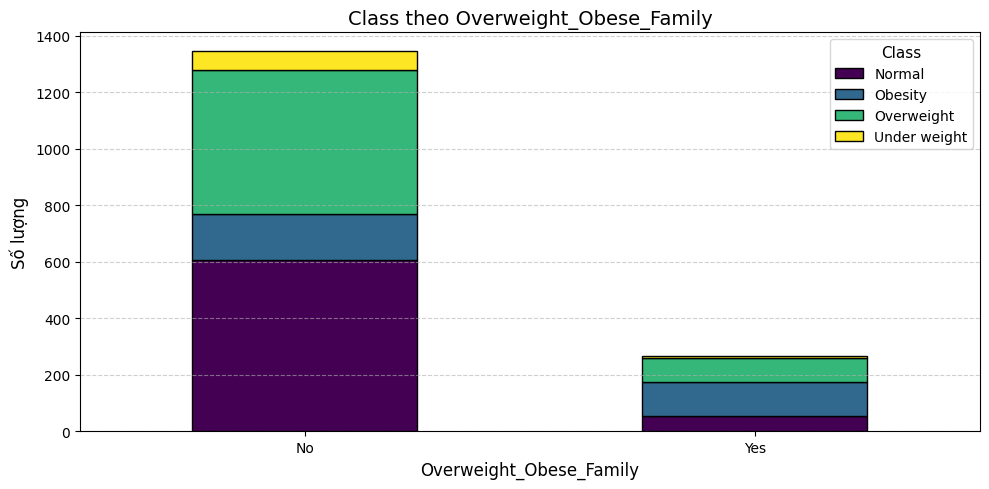

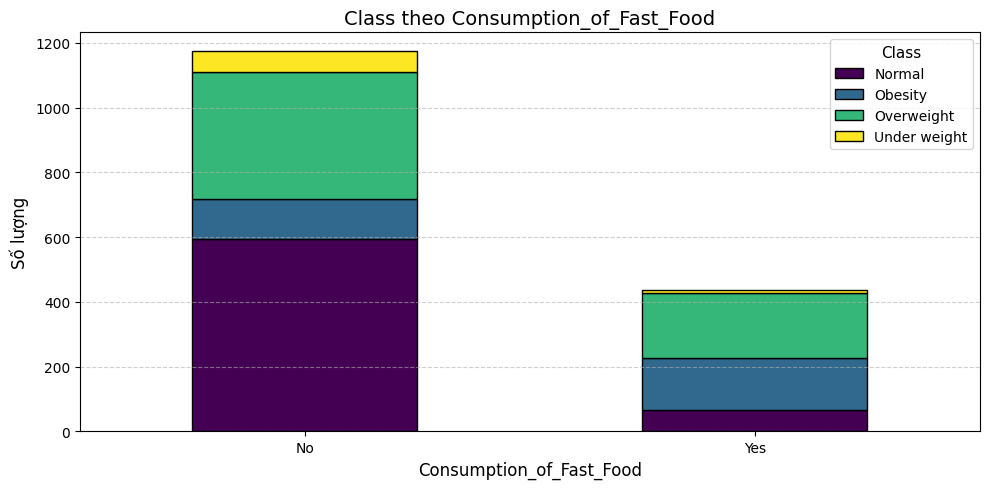

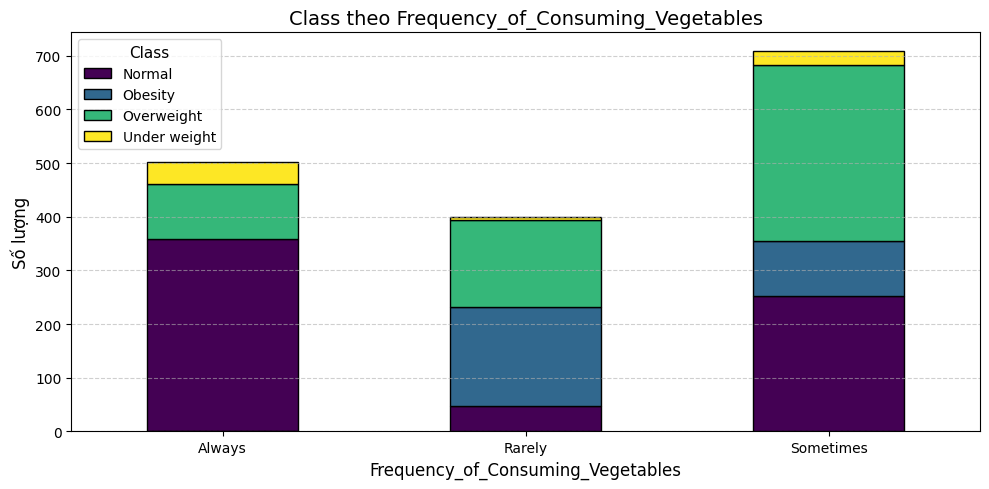

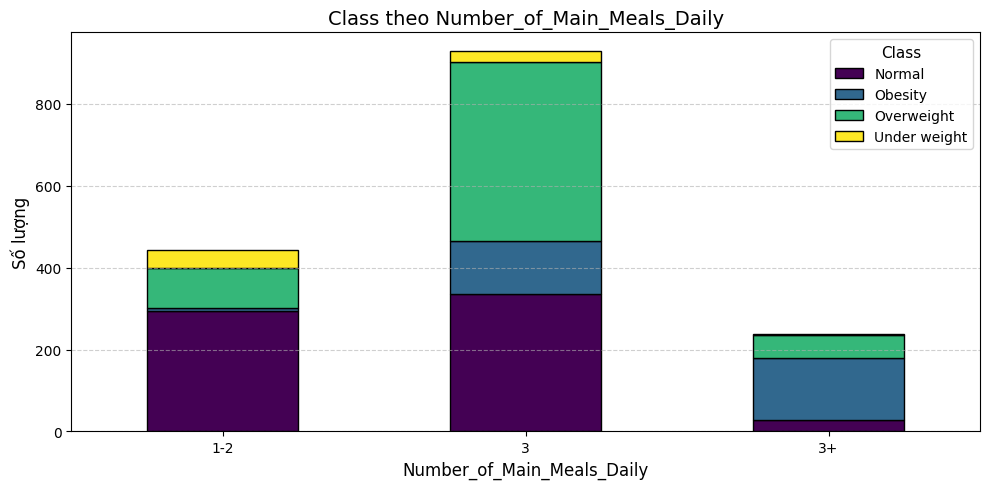

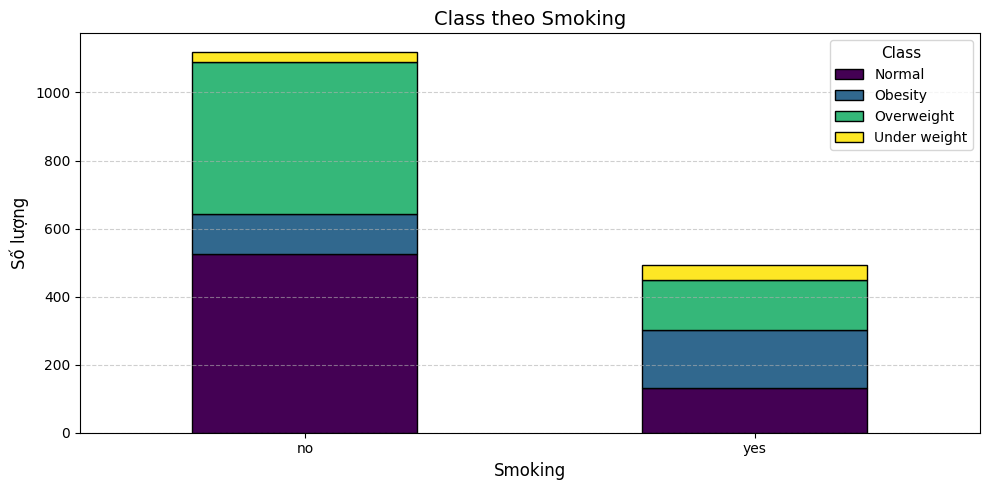

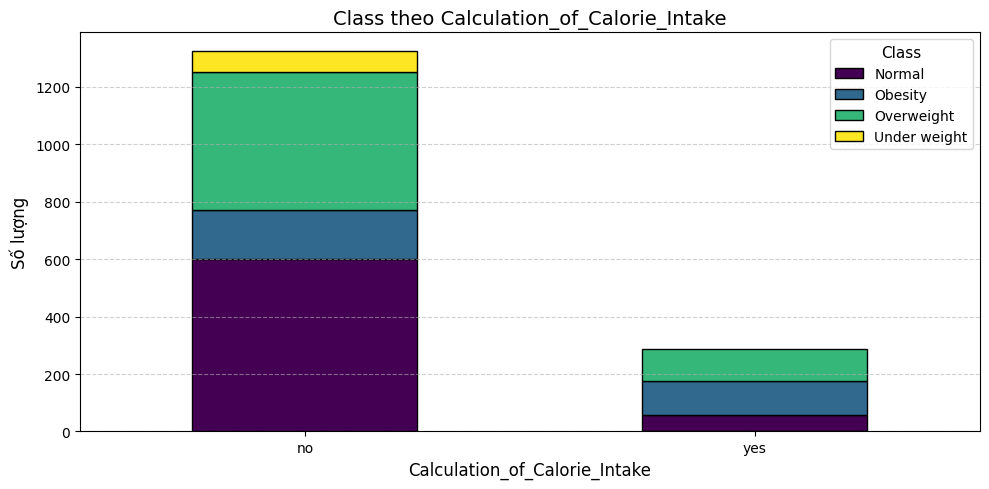

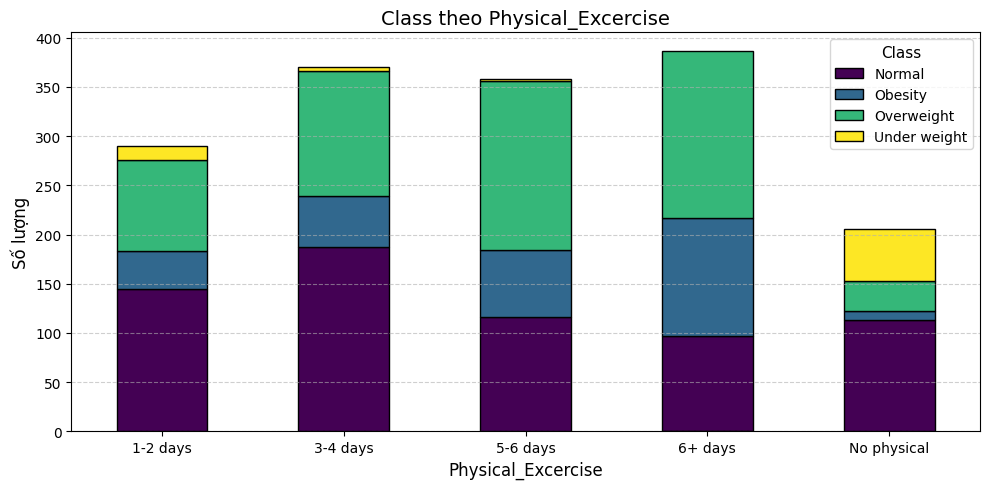

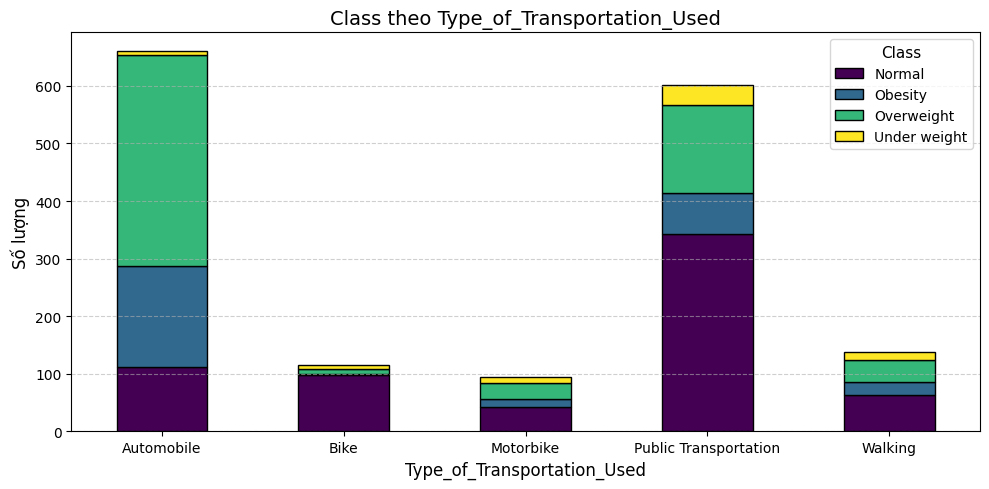

In [81]:
categorical_columns = [
    'Sex', 'Overweight_Obese_Family', 'Consumption_of_Fast_Food',
    'Frequency_of_Consuming_Vegetables', 'Number_of_Main_Meals_Daily', 'Smoking',
    'Calculation_of_Calorie_Intake', 'Physical_Excercise', 'Type_of_Transportation_Used'
]
# Vẽ lại từng stacked bar chart với legend hiển thị rõ ràng
for col in categorical_columns:
    counts = df.groupby([categorical_df[col], Class_df['Class']]).size().unstack(fill_value=0)
    fig, ax = plt.subplots(figsize=(10, 5))
    counts.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black', ax=ax)
    ax.set_title(f"Class theo {col}", fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Số lượng", fontsize=12)
    ax.tick_params(axis='x', rotation=0)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.legend(title="Class", fontsize=10, title_fontsize=11, loc='best')

    plt.tight_layout()
    plt.show()
    
    plt.close(fig)


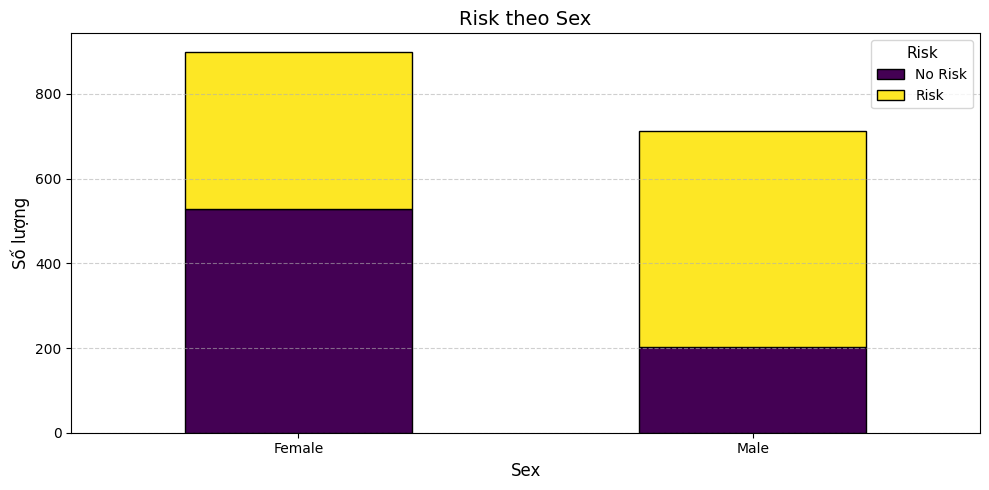

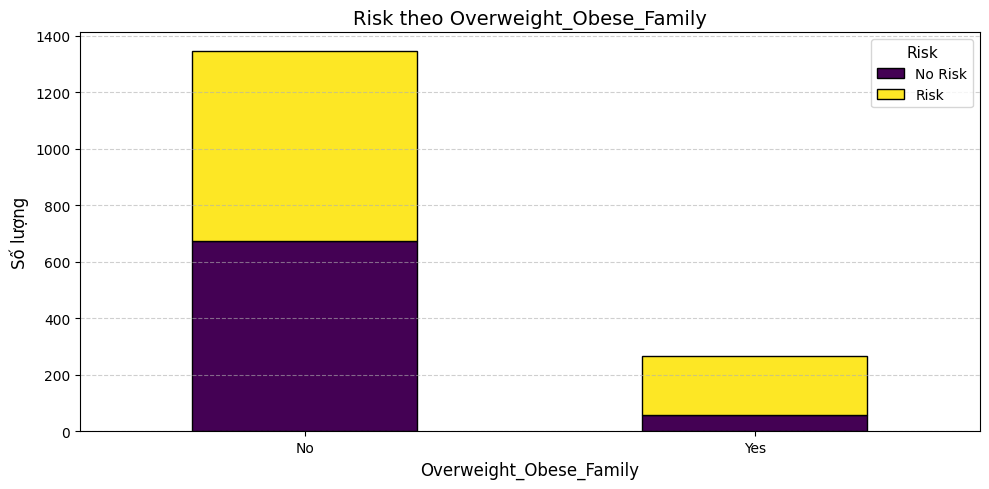

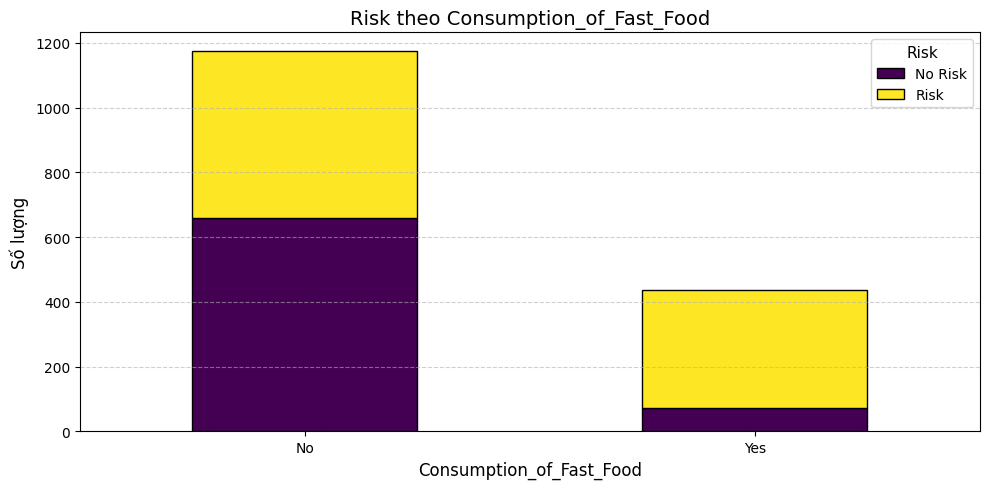

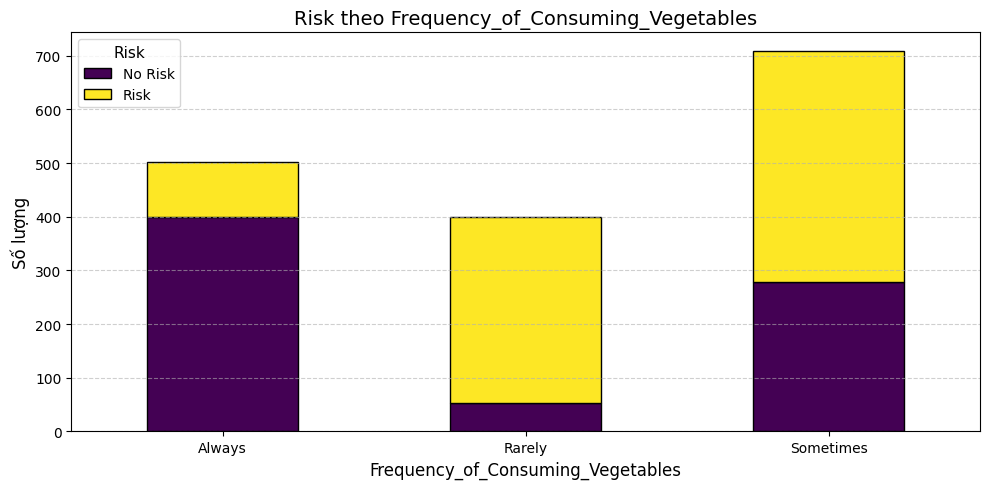

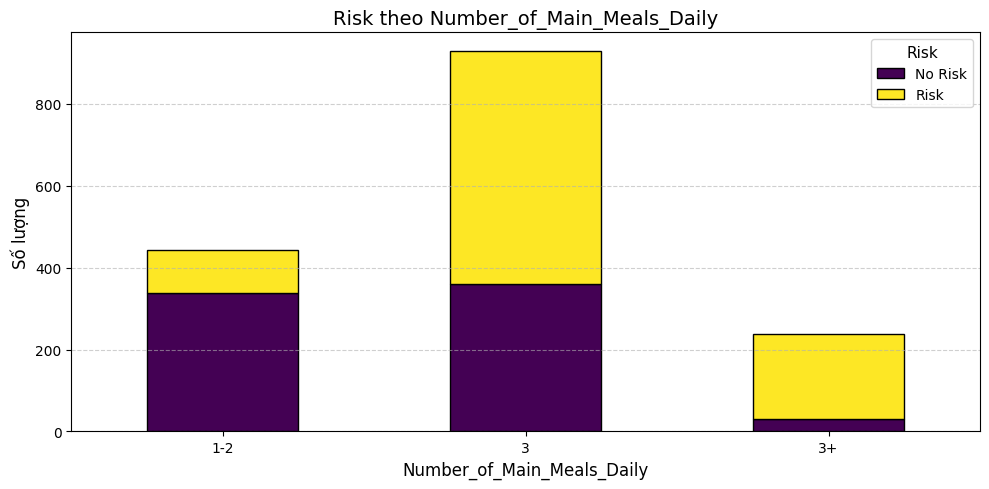

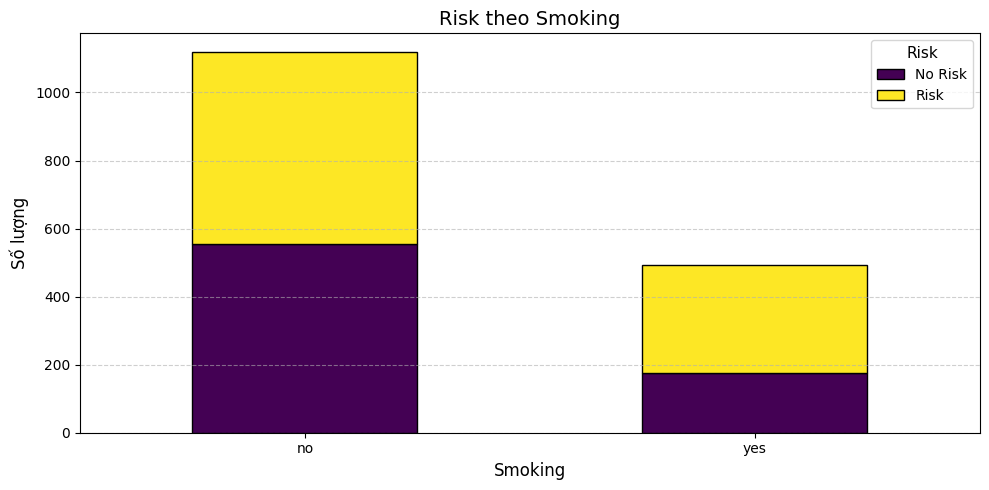

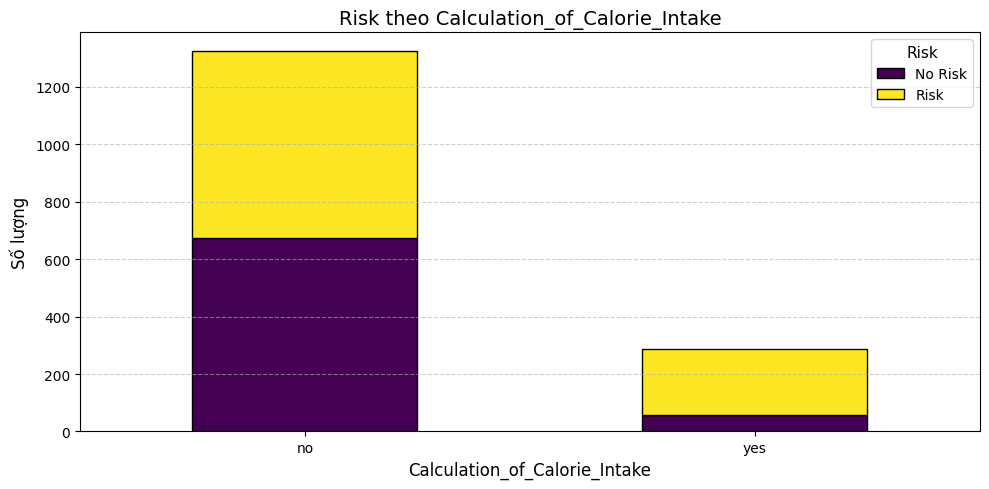

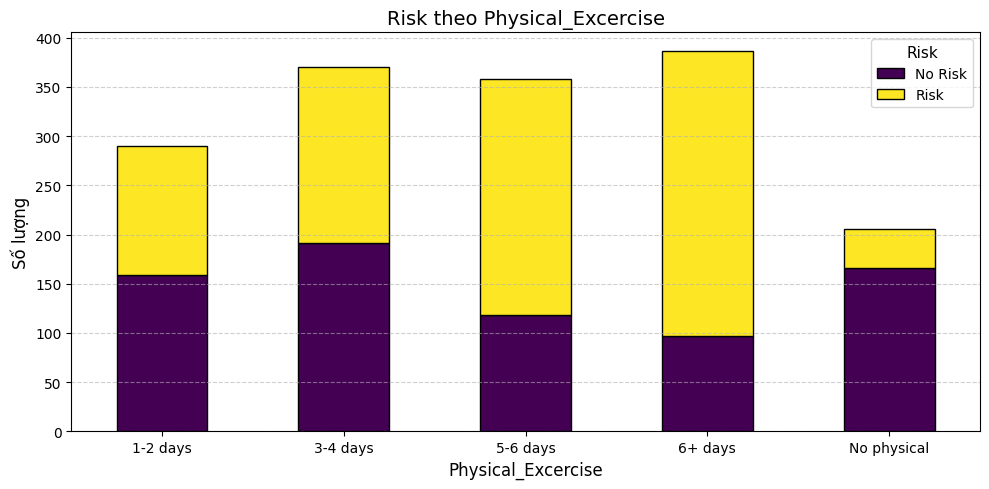

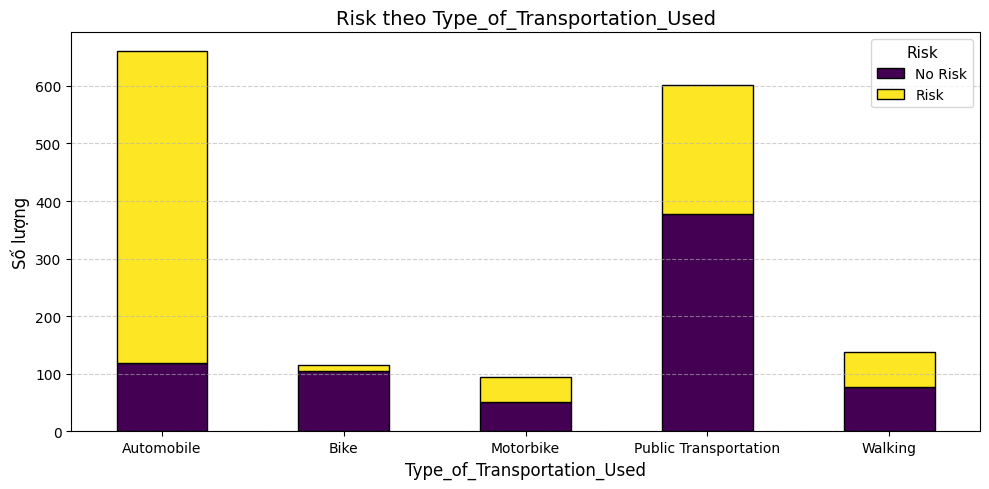

In [ ]:
categorical_columns = [
    'Sex', 'Overweight_Obese_Family', 'Consumption_of_Fast_Food',
    'Frequency_of_Consuming_Vegetables', 'Number_of_Main_Meals_Daily', 'Smoking',
    'Calculation_of_Calorie_Intake', 'Physical_Excercise', 'Type_of_Transportation_Used'
]
# Vẽ lại từng stacked bar chart với legend hiển thị rõ ràng
for col in categorical_columns:
    counts = df.groupby([categorical_df[col], Risk_df['Risk']]).size().unstack(fill_value=0)

    fig, ax = plt.subplots(figsize=(10, 5))
    counts.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black', ax=ax)
    ax.set_title(f"Risk theo {col}", fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Số lượng", fontsize=12)
    ax.tick_params(axis='x', rotation=0)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.legend(title="Risk", fontsize=10, title_fontsize=11, loc='best')

    plt.tight_layout()
    plt.show()
    
    plt.close(fig)
